In [84]:
import pyvista
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'Proxima nova'
plt.rcParams['font.size'] = 20


In [86]:
points = np.arange(0.01, 0.12, 0.01)

pyVista_res_l2 = pd.DataFrame()
pyVista_res_l2['points'] = points
pyVista_res_l2.set_index('points', inplace = True)

pyVista_res_avg = pd.DataFrame()
pyVista_res_avg['points'] = points
pyVista_res_avg.set_index('points', inplace = True)

In [87]:
def get_sample_data(path):
    filename = path + '.vtk'
    mesh = pyvista.read(filename)
    sample = [] 
    for i in points:
         sample.append(mesh.sample_over_line((0, -0.00227, i),(0, 0.00227, i),resolution=20)['U'].max())#resolution=15
    averg = [] 
    for i in points:
        
        buf = mesh.sample_over_line((0, -0.00227, i),(0, 0.00227, i),resolution=30)['U']
        averg.append(np.average(buf))#resolution=15
    
    return sample,averg

In [102]:
files =['16','32','64']

for i in files:
    pyVista_res_l2[i],pyVista_res_avg[i] = get_sample_data('vtk/'+i+'_1200')

In [103]:
pyVista_res_l2

,16,32,64,128
points,,,,
0.01,0.863116,0.862306,0.852445,0.849984
0.02,0.957018,0.967599,0.967840,0.969333
0.03,0.991238,1.007955,1.011566,1.014957
0.04,1.004513,1.024169,1.028913,1.033196
0.05,1.009803,1.030852,1.035975,1.040693
0.06,1.011934,1.033639,1.038890,1.043810
0.07,1.012796,1.034805,1.040097,1.045114
0.08,1.013146,1.035296,1.040597,1.045661
0.09,1.013289,1.035502,1.040805,1.045891


In [104]:
v_max = 1.0432

In [105]:
error = np.abs(pyVista_res_l2 - 1.0432)

In [106]:
error.loc[0.11]

16     0.029830
32     0.007573
64     0.002271
128    0.002828
Name: 0.11, dtype: float32

# Analytical solution

f = 0.4, Pressure Gradient = 11.984987, dpdx = 11.488676


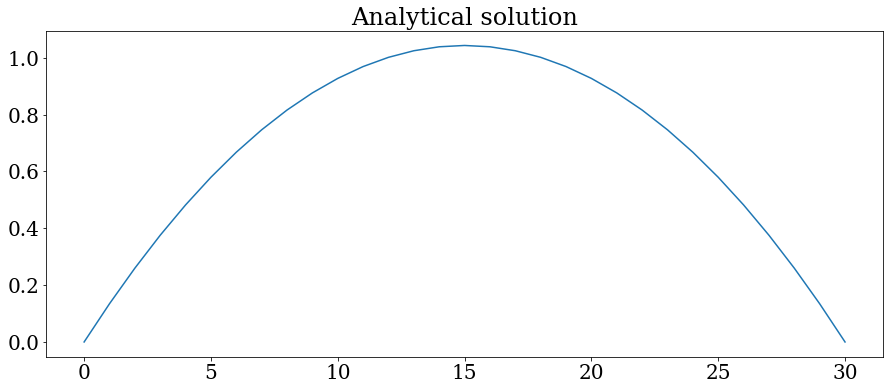

In [108]:
#radius
R = 0.00227 
#density
rho = 1.0
v = 0.5216
#Reynolds number
Re = rho*v*R*2/(1.48e-05)
length = 0.5
#friction factor
f = 64/Re
dP = f*length*1*v**2/(2*R*2)
pressureGrad = dP/length
dPdx = 1.48e-05*4/(R**2)
v_max = v*2
v_max
print('f = {:2.4}, Pressure Gradient = {:2.8}, dpdx = {:2.8}'.format(f, pressureGrad, dPdx))

plt.figure(figsize=(15,6))
r1 = np.linspace(-0.00227,0.00227,31)#,1000)
r = np.sqrt(r1**2)  # array how radius changing
analytical_solution = (R**2-r**2)*(1/(4*1.48e-05))*pressureGrad 
plt.title('Analytical solution')
plt.plot(analytical_solution);

In [110]:
plots = []

for i in files: 
    filename = 'vtk/'+i+'_1200.vtk'
    mesh = pyvista.read(filename)

    plots.append(mesh.sample_over_line((0, -0.00227, 0.11),(0, 0.00227, 0.011),resolution = 30)['U'][:,-1])


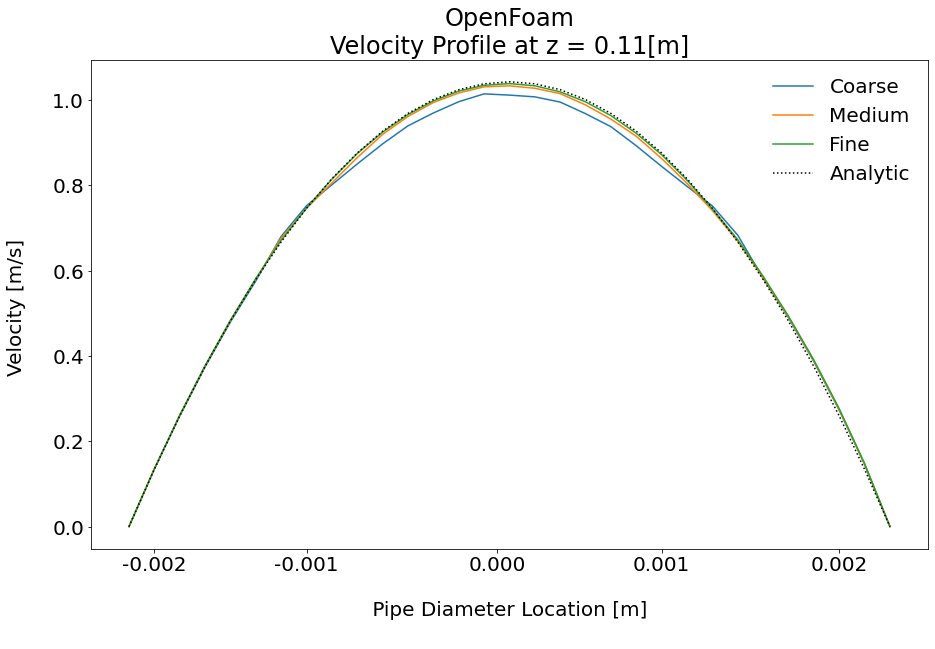

In [130]:
plt.figure(figsize=(15,9))
x = np.linspace(0,30,1000)
labels = ['Coarse', 'Medium', 'Fine']
for i in range(0,len(files)):
    plt.plot(plots[i], label = labels[i])
plt.plot(analytical_solution, label = 'Analytic', color = 'black', linestyle = ':')
plt.xlabel('\n Pipe Diameter Location [m] \n')
plt.xticks([1,7,14.5,21,28],['-0.002','-0.001','0.000','0.001','0.002']);
plt.ylabel('Velocity [m/s] \n')
plt.title('OpenFoam\nVelocity Profile at z = 0.11[m]')
plt.legend(loc="upper right", frameon = False)
plt.savefig('Vel_Mesh16-32-64.png',dpi =300);